In [1]:
import pandas as pd
data = [1, 2, 3, 4, 50]
df1 = pd.DataFrame(data)
print("mean:", df1.mean())
print("median:", df1.median())


mean: 0    12.0
dtype: float64
median: 0    3.0
dtype: float64


In [2]:
# 상관계수와 공분산 검색해서 따로 더 공부하기! 데이터 분석에 있어서 지속적으로 쓰이는 개념이다. 

In [3]:
# 기타 학습 => min-max scaling

import pandas as pd
from sklearn.preprocessing import MinMaxScaler
data = [[-1, 2], [-0.5, 6], [0, 10], [1, 18]]
df = pd.DataFrame(data, columns = ['a', 'b'])
colnames = df.columns

scaler = MinMaxScaler()

# min-max 값 학습
scaler.fit(df)

# min-max scaling 수행
print(scaler.transform(df))
new_colnames = [i+ '_mms' for i in colnames]

# dataframe으로 minmax scaling된 것과 변환전 데이터 같이 나타내기
pd.concat([df, pd.DataFrame(scaler.fit_transform(df[colnames]), columns = new_colnames)], axis = 1)

[[0.   0.  ]
 [0.25 0.25]
 [0.5  0.5 ]
 [1.   1.  ]]


,a,b,a_mms,b_mms
0,-1.0,2,0.00,0.00
1,-0.5,6,0.25,0.25
2,0.0,10,0.50,0.50
3,1.0,18,1.00,1.00


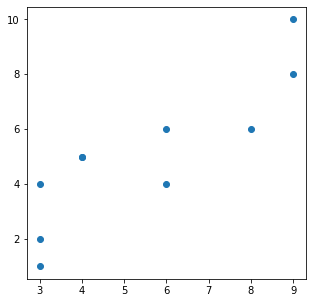

In [4]:
# 분산은 데이터가 퍼져 있는 정도이고, 공분산은 x와 y의 관계를 나타내는 지표가 된다.
import matplotlib.pyplot as plt
plt.figure(figsize = (5, 5)) 
x = [8, 3, 6, 6, 9, 4, 3, 9, 3, 4]
y = [6, 2, 4, 6, 10, 5, 1, 8, 4, 5]
plt.plot(x, y, "o")

In [5]:
# 넘파이로 분산 구하는 공식.
import numpy as np
np.cov(x, y)     

array([[6.05555556, 5.61111111],
       [5.61111111, 6.98888889]])

In [6]:
# 공분산 구하기
covar = np.cov(x, y)[0, 1]
print(covar)

5.61111111111111


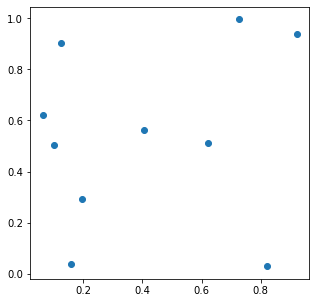

In [7]:
plt.figure(figsize = (5, 5)) 
x = np.random.random(10)
y = np.random.random(10)
plt.plot(x, y, "o")

In [8]:
covar = np.cov(x, y)[0, 1]
print(covar)

0.021274147347369425


In [9]:
# page 229

In [10]:
# anaconda prompt 관리자 권한으로 실행해서 conda install pandas-datareader 쳐서 설치하면 됨.
import pandas_datareader.data as web
# 이 페이지에서는 미리 했지만 pandas패키지도 없다면 import 해 주어야 한다.

In [11]:
all_data = {ticker: web.get_data_yahoo(ticker)
           for ticker in ["AAPL", "IBM", "MSFT", "GOOG"]}
price = pd.DataFrame({ticker: data['Adj Close']
                      for ticker, data in all_data.items()})
volume = pd.DataFrame({ticker: data['Volume']
                      for ticker, data in all_data.items()})

In [12]:
price.head()

,AAPL,IBM,MSFT,GOOG
Date,,,,
2016-06-01,22.994963,122.114479,48.688492,734.150024
2016-06-02,22.822144,122.907143,48.347626,730.400024
2016-06-03,22.868847,122.418724,47.711952,722.340027
2016-06-06,23.034662,122.290611,48.025192,716.549988
2016-06-07,23.128084,122.771080,47.997551,716.650024


In [13]:
volume.head()

,AAPL,IBM,MSFT,GOOG
Date,,,,
2016-06-01,116693200.0,2663400.0,25324800.0,1253600
2016-06-02,160766400.0,2642600.0,22840800.0,1341800
2016-06-03,114019600.0,2328300.0,23368300.0,1226300
2016-06-06,93170000.0,2378700.0,18243300.0,1565300
2016-06-07,89638000.0,4465000.0,20866800.0,1336200


In [17]:
returns = price.pct_change()    # 이전 값에 비해서 변화된 비율. "현재값/(현재값-이전값)"
returns.head()

,AAPL,IBM,MSFT,GOOG
Date,,,,
2016-06-01,NaN,NaN,NaN,NaN
2016-06-02,-0.007516,0.006491,-0.007001,-0.005108
2016-06-03,0.002046,-0.003974,-0.013148,-0.011035
2016-06-06,0.007251,-0.001047,0.006565,-0.008016
2016-06-07,0.004056,0.003929,-0.000576,0.000140


In [18]:
# 상관계수
returns['MSFT'].corr(returns['IBM'])

0.5299222515488852

In [19]:
# 공분산
returns['MSFT'].cov(returns['IBM'])

0.0001501195629095906

In [20]:
# 각 변수들 간의 상관계수. 연관성이 높은 항목을 알 수 있다.
returns.corr()

,AAPL,IBM,MSFT,GOOG
AAPL,1.000000,0.445905,0.726443,0.660388
IBM,0.445905,1.000000,0.529922,0.492370
MSFT,0.726443,0.529922,1.000000,0.771513
GOOG,0.660388,0.492370,0.771513,1.000000


In [22]:
# 공분산과 correlation은 내용은 같은 것.(?) corr를 쓰고 공분산은 언급 정도만 되면 된다.
returns.cov()

,AAPL,IBM,MSFT,GOOG
AAPL,0.000363,0.000139,0.000239,0.000212
IBM,0.000139,0.000268,0.000150,0.000136
MSFT,0.000239,0.000150,0.000299,0.000225
GOOG,0.000212,0.000136,0.000225,0.000284


In [ ]:
# ML, DEEP learning : vias(편향)를 조심해야 함.
# 일반 통계 분석 : 상관관계 vs 인과관계 (동일시하면 안된다. 잘 구분하기. 우리가 데이터 분석으로 알 수 있는 것은 상관관계이다.)

In [23]:
returns.corrwith(returns.IBM)    # IBM만 기준으로 다른 집합들과 상관관계 보여 주는 것.

AAPL    0.445905
IBM     1.000000
MSFT    0.529922
GOOG    0.492370
dtype: float64

In [24]:
returns.corrwith(volume)      # 거래량(volume)과 가격변동률(return) 사이에는 어떤 상관관계가 있을까? => 음의 상관관계가 있다.
                              # 결과값을 보면, 거래량이 클수록 가격 변동률이 낮음을 알 수 있다.
                              # 구글, IBM은 

AAPL   -0.054224
IBM    -0.099947
MSFT   -0.063428
GOOG   -0.116994
dtype: float64

In [26]:
volume.head()

,AAPL,IBM,MSFT,GOOG
Date,,,,
2016-06-01,116693200.0,2663400.0,25324800.0,1253600
2016-06-02,160766400.0,2642600.0,22840800.0,1341800
2016-06-03,114019600.0,2328300.0,23368300.0,1226300
2016-06-06,93170000.0,2378700.0,18243300.0,1565300
2016-06-07,89638000.0,4465000.0,20866800.0,1336200


In [27]:
s1 = pd.Series(['c', 'a', 'd', 'a', 'a', 'b', 'b', 'c', 'c'])

In [28]:
unique_items = s1.unique()
print(unique_items)

['c' 'a' 'd' 'b']


In [29]:
s1.value_counts()

c    3
a    3
b    2
d    1
dtype: int64